In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
single_image = X_train[0]

In [7]:
single_image.shape

(28, 28)

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

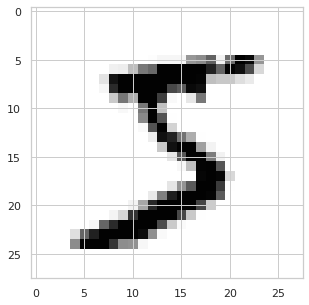

In [10]:
plt.imshow(single_image, cmap='Greys')

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# Notice first entry is 5!

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_example = to_categorical(y_train)

In [16]:
y_example.shape

(60000, 10)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

### Processing X Data

We should normalize the X data

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
scaled_image = X_train[0]

In [23]:
scaled_image.max()

1.0

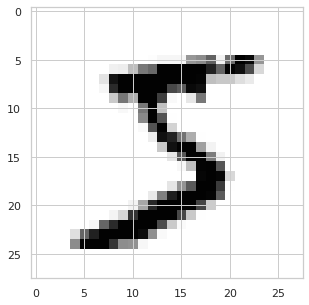

In [25]:
plt.imshow(scaled_image, cmap='Greys');

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [26]:
# batch_size, width, heigth, color_channels
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

# Training the Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [28]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid',
                 input_shape=(28,28,1), activation = 'relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES. SOFTMAX --> MULTI CLASS PROBLEM
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

Hyperparametersbased on data:

- input_shape: HAS to be (28,28,1), because it is a 28x28 pixels image with one channel.
- Flatten layer has be to there to use array.
- Final dense layer: number of classes needs to be number of neurons in this layer and activation needs to be softmax.

Hyperparameters we can play with:
- Number of convolutional and pooling layers. This includes all the filters, kernel_sizes, padding, activation...
- Number of dense layers after flatten (typically one or two) including number of nodes.

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience = 1)

## Train the Model

In [31]:
model.fit(X_train,y_cat_train, epochs = 10, validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1393 - accuracy: 0.9581 - val_loss: 0.0582 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0429 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0450 - val_accuracy: 0.9836


## Evaluate the Model

In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139261,0.958050,0.058180,0.9814
1,0.047088,0.985667,0.042938,0.9849
2,0.030320,0.990300,0.045038,0.9836


<AxesSubplot:>

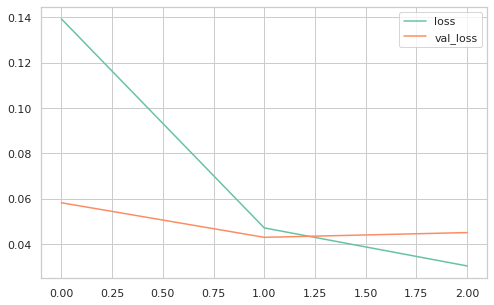

In [34]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

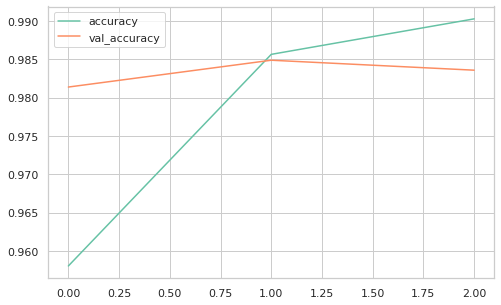

In [35]:
metrics[['accuracy','val_accuracy']].plot()

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(X_test, y_cat_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0450 - accuracy: 0.9836


[0.0450376495718956, 0.9836000204086304]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [41]:
predictions[0]

7

Need to compare these predictions to the actual `y_test` (not `y_cat_test`).

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.96      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.96      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [43]:
confusion_matrix(y_test, predictions)

array([[ 974,    0,    2,    1,    0,    0,    3,    0,    0,    0],
       [   0, 1125,    1,    0,    0,    0,    7,    0,    2,    0],
       [   3,    6, 1008,    0,    0,    0,    3,    3,    9,    0],
       [   1,    0,    2,  992,    0,    3,    0,    2,   10,    0],
       [   0,    0,    0,    0,  968,    0,    7,    1,    2,    4],
       [   2,    0,    0,    6,    0,  866,   12,    0,    5,    1],
       [   3,    1,    0,    0,    1,    1,  950,    0,    2,    0],
       [   1,    2,   12,    0,    0,    0,    0, 1010,    1,    2],
       [   2,    0,    0,    0,    0,    0,    5,    2,  964,    1],
       [   5,    3,    0,    0,    5,    2,    1,    7,    7,  979]])

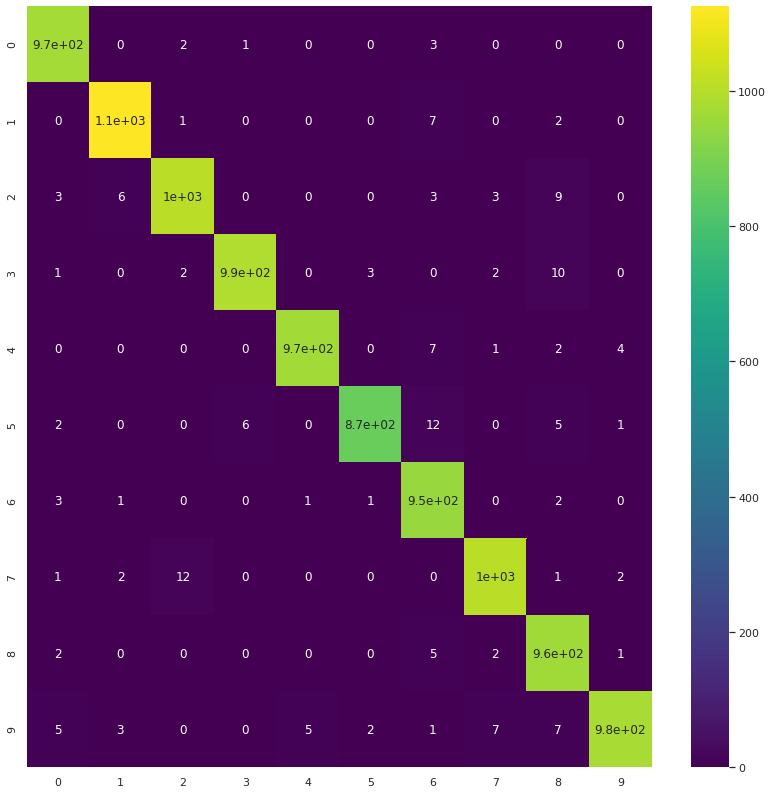

In [46]:
plt.figure(figsize=(14,14))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='viridis');

# Predicting a given image

In [47]:
my_number = X_test[0]

In [48]:
my_number.shape

(28, 28, 1)

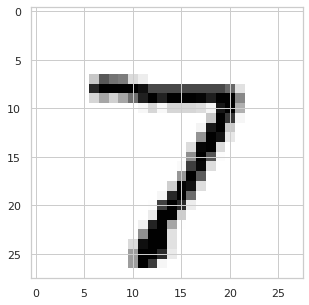

In [49]:
plt.imshow(my_number.reshape(28,28), cmap='Greys');

In [51]:
# num_images, width, height, color_channels
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7])